A R Markdown notebook to showcase a small data viz of a few days worth of Jump Bike D.C data that I have been collecting. 

First, opening the SQLite database, which I orginally created in Python. But opening it is not much of a problem. Also learned how SQLite works in R now, so that is nice. 

In [9]:
library(RSQLite)
library(DBI)
library(ggplot2)
library(ggthemes)
library(emoGG)
library(leaflet)
library(rmarkdown)
library(htmlwidgets)
library(IRdisplay)

Connecting to the database and displaying the data below. Have found the average of multiple values in the original data such as charge time and cordinates. 

In [10]:
con = dbConnect(SQLite(), dbname="jumpBikeTime.db")
query <- dbSendQuery(con, "SELECT * FROM timeseries")
data <- dbFetch(query, n = -1)

In [11]:
paged_table(data)

id,averageCharge,bikeAmount,latitudeAverage,longitudeAverage,time
0,87.00000,169,38.91214,-77.01120,2018-11-09T13:51:53.641881
1,84.76705,176,38.90532,-77.01811,2018-11-09T17:00:30.736724
2,83.30769,182,38.90599,-77.01982,2018-11-09T22:00:31.864401
3,84.80892,157,38.91166,-77.00770,2018-11-10T10:01:21.133279
4,87.23469,196,38.90786,-77.01406,2018-11-10T14:28:43.054594
5,84.25749,167,38.90794,-77.01835,2018-11-10T19:04:44.094014
6,81.62893,159,38.90699,-77.01609,2018-11-11T00:00:28.198338
7,86.81183,186,38.91187,-77.00664,2018-11-11T10:34:57.218504
8,88.77297,185,38.91388,-77.00780,2018-11-11T15:46:47.433607
9,82.54967,151,38.90882,-77.01068,2018-11-11T20:57:33.942294


Below are two charts, one of amount of bikes on the streets, and another on change in average charge. 

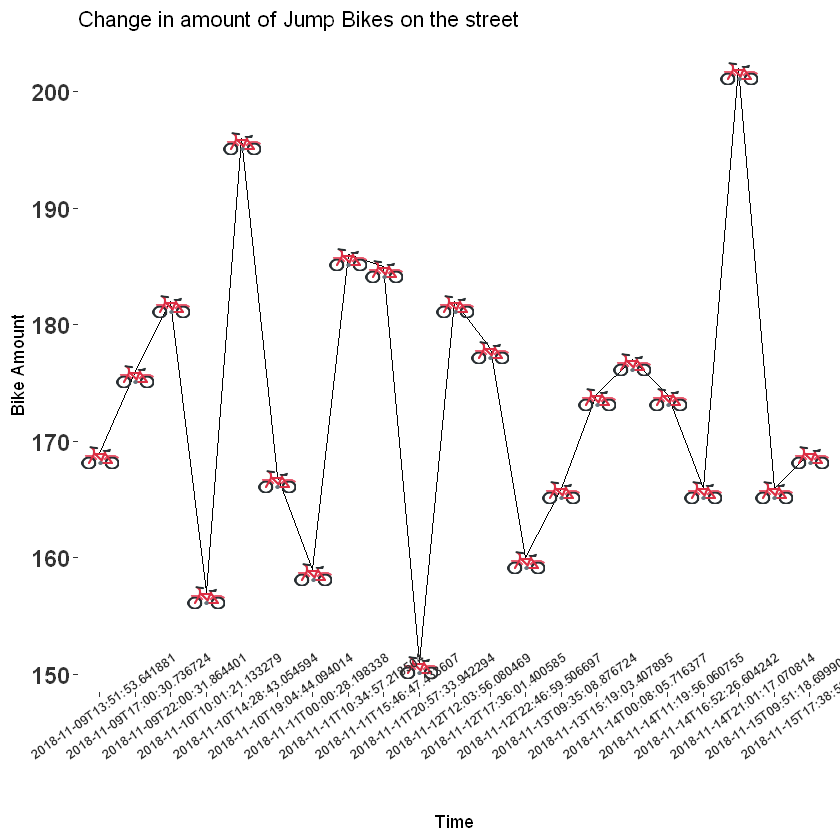

In [12]:
x <- data$time
y <- data$bikeAmount
d <- data.frame(x, y)

ggplot(d, aes(x,y, group = 1)) + geom_line() + theme(
  axis.text.x = element_text(face="bold", color="#333333", size=7.5, angle=35),
  axis.text.y = element_text(face="bold", color="#333333", size=14),
  panel.background = (element_rect(fill ='white'))) + ggtitle("Change in amount of Jump Bikes on the street") +
  labs(x = 'Time', y='Bike Amount') + geom_emoji(emoji='1f6b2')

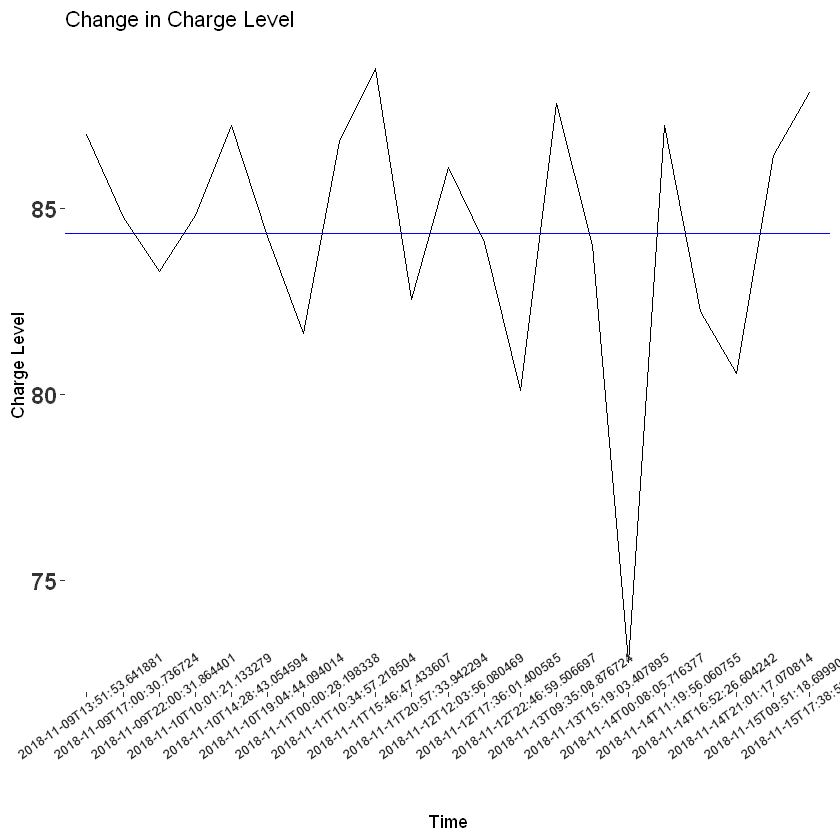

In [25]:
a <- data$time
b <- data$averageCharge
d2 <- data.frame(a, b)

ggplot(d2, aes(a, b, group = 1)) + geom_line() + geom_hline(yintercept = mean(b), color="blue") + 
      theme(
      axis.text.x = element_text(face="bold", color="#333333", size=7.5, angle=35),
      axis.text.y = element_text(face="bold", color="#333333", size=14),
      panel.background = (element_rect(fill ='white'))) + ggtitle("Change in Charge Level") +
      labs(x = 'Time', y='Charge Level')

Below we have a leaflet map showing the average lat and long of the bikes during various parts of the day and week. 

In [20]:
lat= data$latitudeAverage
long = data$longitudeAverage
time = data$time
dLoc = data.frame(lat, long, time)

str = paste("Time = (",dLoc$time,")", "Location = (", dLoc$lat, "/", dLoc$long, ")")

map = leaflet(data = dLoc) %>% addProviderTiles(providers$OpenStreetMap) %>%
  addMarkers(~long, ~lat, popup=(str))
             
saveWidget(map, 'map.html', selfcontained = FALSE)
display_html('<iframe src="map.html"></iframe>')